# Compare Conll2003 dataset with sentence and document as an example

## Read conll as a sentence as an example

In [12]:
def read_conll_sentences(file_path):
    with open(file_path) as f:
        sentence = {'tokens': [], 'ner_tags': []}
        for line in f:
            if line.strip() == '-DOCSTART- -X- -X- O' or line.strip() == '':
                if len(sentence['tokens']) > 0:
                    yield sentence 
                sentence = {'tokens': [], 'ner_tags': []}
            else:
                l = line.split()

                sentence['tokens'].append(l[0])
                sentence['ner_tags'].append(l[3])

## Read conll as a document as an example

In [ ]:
def read_conll_docs(file_path):
    with open(file_path) as f:
        doc = {'tokens': [], 'ner_tags': []}
        for line in f:
            if line.strip() == '-DOCSTART- -X- -X- O':
                if len(doc['tokens']) > 0:
                    yield doc 
                doc = {'tokens': [], 'ner_tags': []}
            elif line.strip() == '':
                continue
                
            else:
                l = line.split()

                doc['tokens'].append(l[0])
                doc['ner_tags'].append(l[3])

## Number of examples for the 2 datasets

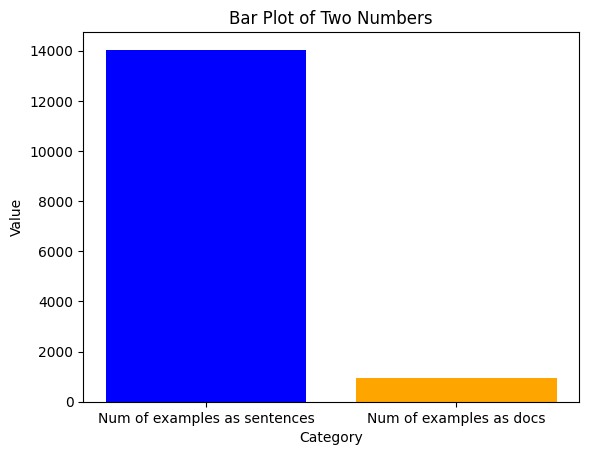

In [44]:
data_sentences = list(read_conll_sentences('data/train.txt'))
data_docs = list(read_conll_docs('data/train.txt'))

labels = ['Num of examples as sentences', 'Num of examples as docs']
values = [len(data_sentences), len(data_docs)]  # Replace these values with your numbers

plt.bar(labels, values, color=['blue', 'orange'])
plt.title('Bar Plot of Two Numbers')
plt.xlabel('Category')
plt.ylabel('Value')
plt.show()

## calculate the number of words in each example in the 2 datasets (sentence based and document based)

In [67]:
import numpy as np
sent_len = list(map(lambda example: len(example['tokens']), data_sentences))
doc_len = list(map(lambda example: len(example['tokens']), data_docs))

## Estimate the distribution of the 2 datasets
using Kernel Denisty Estimation to get the distribution of the 2 datasets

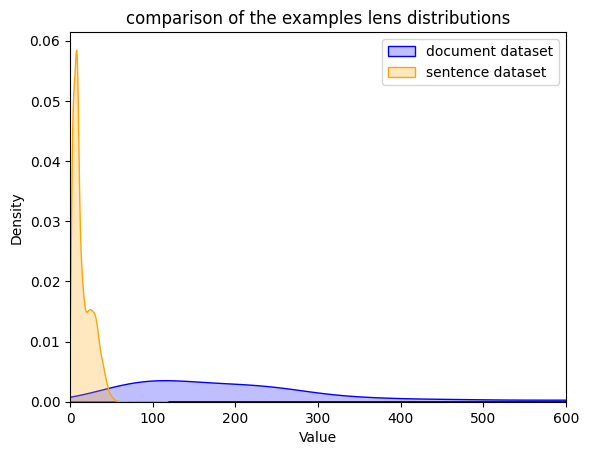

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

# Example list of numbers
data = [1, 2, 2, 3, 4, 5, 6, 7, 8, 9, 10]

sns.kdeplot(doc_len, fill=True, label='document dataset', color='blue')
sns.kdeplot(sent_len, fill=True, label='sentence dataset', color='orange')

plt.xlim(0, 600)

plt.title('comparison of the examples lens distributions')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## [Conclusion]
## Based on this analysis the conclusion is if we decided to move forward with document dataset we will face the following
* some examples will have much words
* since the tokenizer mostly used us a subpiece (may convert a word into subwords) the number of tokens will be much higher.
* the tokenizer will take only the first 512 tokens and truncate the other so, we will lose some data.

## so, we will move forward wil sentence dataset.

# Analyze the labels
* Check the balance of Data.

## Get Dataset label distribution

In [82]:
def get_label_freq(data):
    tag_freq = {}
    for example in data:
        tags = example['ner_tags']
        for t in tags:
            if t not in tag_freq:
                tag_freq[t] = 0
            tag_freq[t] += 1
    return tag_freq

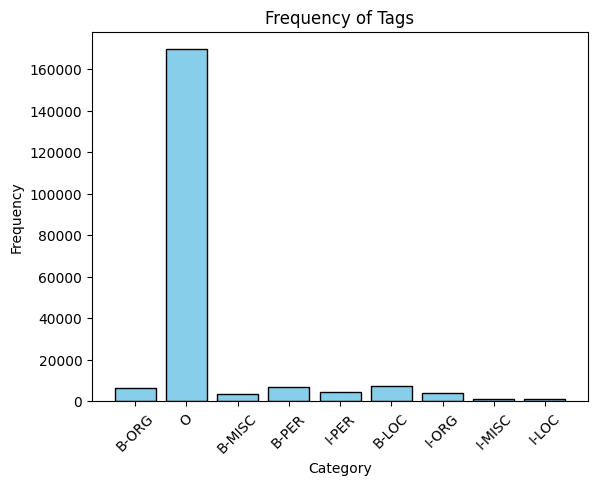

In [86]:
freq = get_label_freq(data_sentences)

plt.bar(list(freq.keys()), list(freq.values()), color='skyblue', edgecolor='black')
plt.title('Frequency of Tags')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## [Conclusion]
* The label Other predominates over the labels

# analyze mentions
* Check the mentions (words) in the dataset and make sure intuitively that it labeled correctly.

In [92]:
def get_mentions_freq(data):
    freq = {}

    for example in data:
        for word, tag in zip(example['tokens'], example['ner_tags']):
            if tag not in freq:
                freq[tag] = {}
            if word not in freq[tag]:
                freq[tag][word] = 0
            freq[tag][word] += 1
    return freq

In [93]:
mention_freq = get_mentions_freq(data_sentences)
mention_freq

{'B-ORG': {'EU': 24,
  'European': 29,
  'Commission': 11,
  'Welsh': 1,
  'NFU': 1,
  'BBC': 2,
  'Foreign': 10,
  'Reuters': 79,
  'People': 2,
  'Shen': 1,
  'Xinhua': 4,
  'Association': 2,
  'Federal': 7,
  'Volkswagen': 4,
  'Opel': 1,
  'General': 1,
  'Ford': 7,
  'Seat': 2,
  'Porsche': 2,
  'Athens': 8,
  'BayerVB': 1,
  'BAYERISCHE': 2,
  'S&P': 7,
  'London': 20,
  'Venantius': 1,
  'Lehman': 3,
  'VENANTIUS': 1,
  '3M': 1,
  'Lloyds': 2,
  'Israel': 2,
  'Likud': 3,
  'Channel': 1,
  'Mujahideen': 3,
  'Kurdistan': 11,
  'KDPI': 2,
  'Resistance': 1,
  'Iraqi': 3,
  'PUK': 25,
  'KDP': 17,
  'PLO': 8,
  'International': 9,
  'Aerostan': 1,
  'Liberal': 4,
  'Duma': 1,
  'U.N.': 40,
  'THAWRA': 1,
  'AN-NAHAR': 2,
  'Hizbollah': 1,
  'AS-SAFIR': 2,
  'AL-ANWAR': 2,
  'AD-DIYAR': 2,
  "NIDA'A": 2,
  'Maronite': 1,
  'CME': 4,
  'KinderCare': 1,
  'SNET': 1,
  'Southern': 5,
  'Wall': 2,
  'Gateway': 1,
  'Consolidated': 1,
  'Le': 15,
  'FLNC': 1,
  'Bally': 1,
  'France': 1

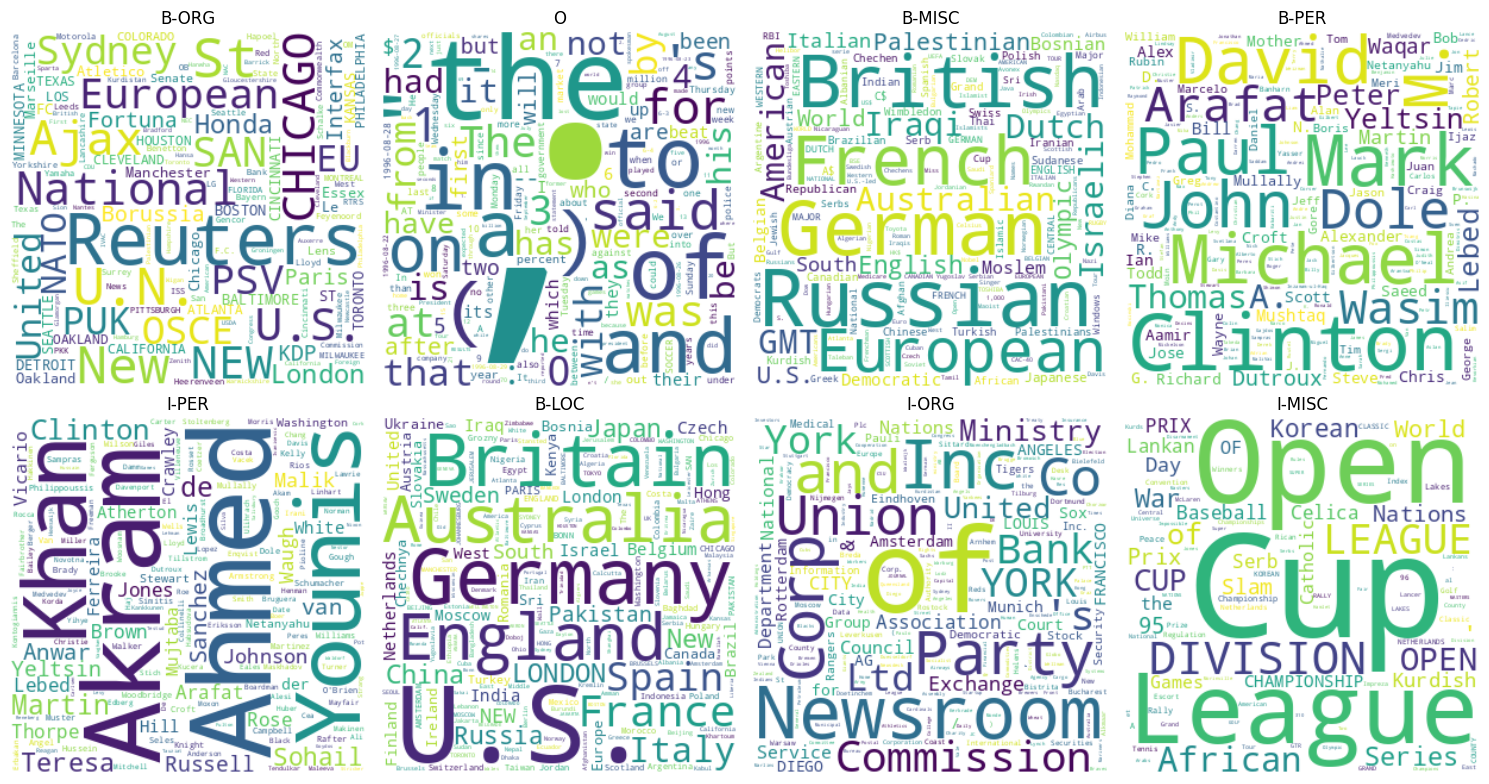

In [96]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Example dictionaries with words and their frequencies
word_freqs = [
    {'Python': 100, 'Data': 80, 'Science': 60},
    {'AI': 90, 'Machine Learning': 70, 'Deep Learning': 50},
    {'Visualization': 85, 'Charts': 65, 'Graphs': 55},
    {'Analytics': 75, 'Statistics': 60, 'Models': 50},
    {'Programming': 80, 'Code': 70, 'Debugging': 60},
    {'Research': 90, 'Papers': 80, 'Studies': 70},
    {'Algorithms': 85, 'Optimization': 75, 'Performance': 65},
    {'Big Data': 95, 'Hadoop': 85, 'Spark': 75}
]

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(15, 8))  # Adjust size as needed

# Plot each word cloud
for ax, (title, word_freq) in zip(axes.flatten(), mention_freq.items()):
    wordcloud = WordCloud(width=300, height=300, background_color='white').generate_from_frequencies(word_freq)
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.axis('off')
    # Add title for each subplot
    ax.set_title(title)

plt.tight_layout()
plt.show()

## [Conclusion]
* The dataset is labels well